In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df = pd.read_csv('twitter_validation.csv')

def tokenize(text):
    return text.split()

df['TweetContent'] = df['TweetContent'].apply(tokenize)

# Lowercasing all words using lower()
df['TweetContent'] = df['TweetContent'].apply(lambda x: [word.lower() for word in x])

# Removing stopwords using stop_words
stop_words = stopwords.words('english')
df['TweetContent'] = df['TweetContent'].apply(lambda x: [word for word in x if word not in stop_words])

# Removing un-necessary punctuations
df['TweetContent'] = df['TweetContent'].apply(lambda x: [re.sub(r'[^a-zA-z0-9]', '', word) for word in x])

# Stemming of words
ps = PorterStemmer()
df['TweetContent'] = df['TweetContent'].apply(lambda x: [ps.stem(word) for word in x])

# Joining list of words back to the string
df['TweetContent'] = df['TweetContent'].apply(lambda x: ' '.join(x))

# Saving the preprocessed-data to a new CSV file
df.to_csv('preprocessed_data_twitter.csv', index=False)

print(df['TweetContent'].head())


0    mention facebook struggl motiv go run day tran...
1    bbc news  amazon boss jeff bezo reject claim c...
2    microsoft pay word function poorli samsungu ch...
3         csgo matchmak full closet hack truli aw game
4    presid slap american face realli commit unlaw ...
Name: TweetContent, dtype: object


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Loading of the preprocessed data
df = pd.read_csv('preprocessed_data_twitter.csv')

# Splitting whole dataset into two separate datasets
df_bow, df_tfidf = train_test_split(df, test_size=0.5, random_state=42)

# Bag-of-Words on 1st part
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(df_bow['TweetContent'])
bow_features = pd.DataFrame(X_bow.toarray())

# Saving BoW features to a new CSV file
bow_features.to_csv('bow_features.csv', index=False)

df_tfidf['TweetContent'] = df_tfidf['TweetContent'].fillna('')

# TF-IDF on the 2nd part
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_tfidf['TweetContent'])
tfidf_features = pd.DataFrame(X_tfidf.toarray())

# Saving TF-IDF features to a new CSV file
tfidf_features.to_csv('tfidf_features.csv', index=False)

y_bow = df_bow['Sentiment']
y_tfidf = df_tfidf['Sentiment']

# Training a simple classifier
clf = MultinomialNB()

# Train and predict for BoW features
clf.fit(bow_features, y_bow)
y_pred_bow = clf.predict(bow_features)
accuracy_bow = accuracy_score(y_bow, y_pred_bow)
print("Accuracy for Bag of Words:", accuracy_bow)

# Train and predict for TF-IDF features
clf.fit(tfidf_features, y_tfidf)
y_pred_tfidf = clf.predict(tfidf_features)
accuracy_tfidf = accuracy_score(y_tfidf, y_pred_tfidf)
print("Accuracy for TF-IDF:", accuracy_tfidf)


Accuracy for Bag of Words: 0.966
Accuracy for TF-IDF: 0.928


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the preprocessed data
df = pd.read_csv('preprocessed_data_twitter.csv')

# Extracting features and target variable
X = df['TweetContent']
y = df['Sentiment']
tweet_ids = df['TweetId']

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test, tweet_ids_train, tweet_ids_test = train_test_split(
    X, y, tweet_ids, test_size=0.2, random_state=42)

# Handling missing values in the text data
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Building Logistic Regression Model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_tfidf, y_train)

# Making predictions
y_pred = logreg_model.predict(X_test_tfidf)

# Creating a new DataFrame with results
results_df = pd.DataFrame({
    'TweetID': tweet_ids_test,
    'OriginalSentiment': y_test,
    'PredictedSentiment': y_pred,
    'TweetContent': X_test
})

# Saving the results to a new CSV file
results_df.to_csv('sentiment_predictions_twitter_data.csv', index=False)

# Evaluating the Performance by calculating accuracy, precision, recall, and f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.5150
Precision: 0.5126
Recall: 0.5150
F1 Score: 0.4963


Metrics for Bag of Words:
Accuracy: 0.966
Precision: 0.9663584542271351
Recall: 0.966
F1 Score: 0.9659186343077472


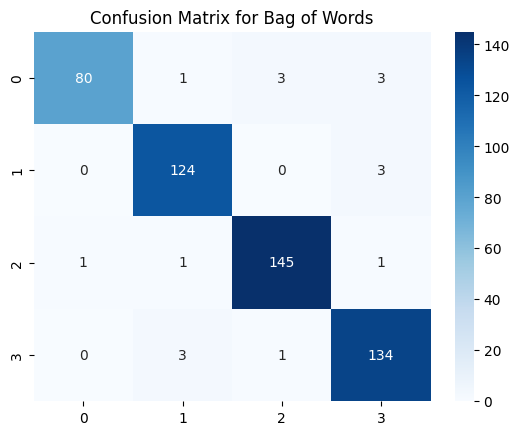


Metrics for TF-IDF:
Accuracy: 0.928
Precision: 0.9337053478775081
Recall: 0.928
F1 Score: 0.9235939949814419


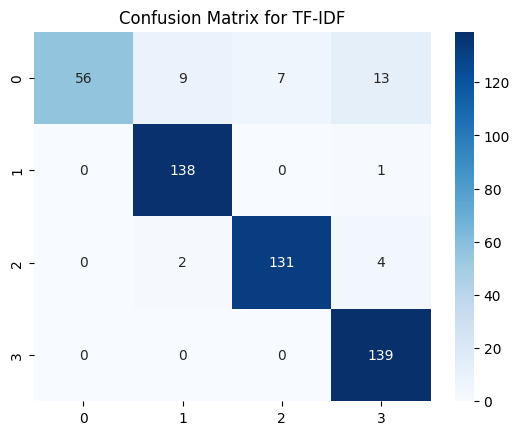

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('preprocessed_data_twitter.csv')

# Splitting into two separate datasets
df_bow, df_tfidf = train_test_split(df, test_size=0.5, random_state=42)

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(df_bow['TweetContent'])
bow_features = pd.DataFrame(X_bow.toarray())

df_tfidf['TweetContent'] = df_tfidf['TweetContent'].fillna('')

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_tfidf['TweetContent'])
tfidf_features = pd.DataFrame(X_tfidf.toarray())

y_bow = df_bow['Sentiment']
y_tfidf = df_tfidf['Sentiment']

clf = MultinomialNB()

clf.fit(bow_features, y_bow)
y_pred_bow = clf.predict(bow_features)

print("Metrics for Bag of Words:")
print("Accuracy:", accuracy_score(y_bow, y_pred_bow))
print("Precision:", precision_score(y_bow, y_pred_bow, average='weighted'))
print("Recall:", recall_score(y_bow, y_pred_bow, average='weighted'))
print("F1 Score:", f1_score(y_bow, y_pred_bow, average='weighted'))

# Confusion Matrix for BoW
conf_matrix_bow = confusion_matrix(y_bow, y_pred_bow)
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bag of Words')
plt.show()

clf.fit(tfidf_features, y_tfidf)
y_pred_tfidf = clf.predict(tfidf_features)

# Evaluating TF-IDF performance
print("\nMetrics for TF-IDF:")
print("Accuracy:", accuracy_score(y_tfidf, y_pred_tfidf))
print("Precision:", precision_score(y_tfidf, y_pred_tfidf, average='weighted'))
print("Recall:", recall_score(y_tfidf, y_pred_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_tfidf, y_pred_tfidf, average='weighted'))

# Confusion Matrix for TF-IDF
conf_matrix_tfidf = confusion_matrix(y_tfidf, y_pred_tfidf)
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for TF-IDF')
plt.show()
